In [1]:
import os
os.chdir("D:\IIT Kanpur\Time Series Project")
os.getcwd()

'D:\\IIT Kanpur\\Time Series Project'

In [2]:
import pandas as pd
nifty_df = pd.read_excel("Nf50_Data6.xlsx")
nifty_df.head()
isinstance(nifty_df, pd.DataFrame)

True

In [3]:
yt_obs = nifty_df["Close"]
yt_obs

0     10883.75
1     10869.50
2     10782.90
3     10601.15
4     10693.70
        ...   
77    11354.25
78    11483.25
79    11445.05
80    11570.00
81    11623.90
Name: Close, Length: 82, dtype: float64

In [4]:
len(yt_obs)
import numpy as np
x = np.arange(len(yt_obs)) + 1
x
nifty_df['x'] = x
nifty_df.head()
nifty_df.drop(nifty_df.columns[[1,2,3]],axis = 1, inplace=True)
nifty_df.head()

,Time,Close,x
0,2018-12-03,10883.75,1
1,2018-12-04,10869.50,2
2,2018-12-05,10782.90,3
3,2018-12-06,10601.15,4
4,2018-12-07,10693.70,5


In [5]:
nifty_time = nifty_df.set_index("Time")
nifty_time

,Close,x
Time,,
2018-12-03,10883.75,1
2018-12-04,10869.50,2
2018-12-05,10782.90,3
2018-12-06,10601.15,4
2018-12-07,10693.70,5
...,...,...
2019-03-25,11354.25,78
2019-03-26,11483.25,79
2019-03-27,11445.05,80


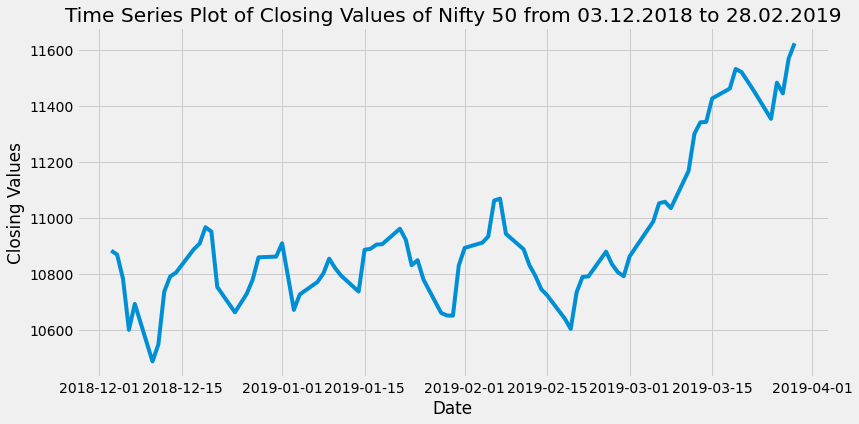

In [8]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 6))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Closing Values")
plt.title("Time Series Plot of Closing Values of Nifty 50 from 03.12.2018 to 28.02.2019")
 
plt.plot(nifty_time["Close"])

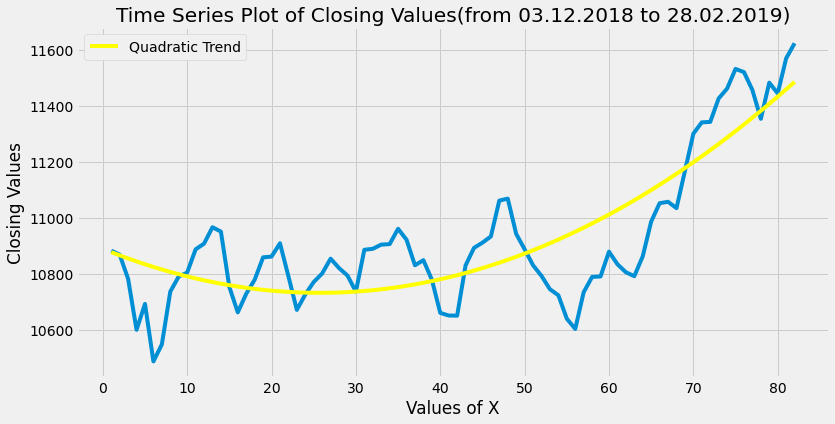

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#lin_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 1))
quad_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 2))
myline = np.linspace(1, 82, 150)



# setting figure size to 12, 10
plt.figure(figsize=(12, 6))
 
# Labelling the axes and setting
# a title
plt.xlabel("Values of X")
plt.ylabel("Closing Values")
plt.title("Time Series Plot of Closing Values(from 03.12.2018 to 28.02.2019)")

plt.plot(nifty_df['x'],nifty_df['Close'])

#plt.plot(myline, lin_trend(myline), color = 'red', label = 'Linear Trend')

plt.plot(myline, quad_trend(myline), color = 'yellow', label = 'Quadratic Trend')

plt.legend(framealpha=1, frameon=True)

plt.show()

#quad_trend(5)

In [11]:
import pandas as pd 
#np.polyfit(nifty_df["x"],nifty_df["High Points"],2)
T_t = quad_trend(x)
detrended_value = yt_obs/T_t
detrended_value

list_of_tuple = list(zip(nifty_df['Time'],x,yt_obs, T_t,detrended_value))
df1 = pd.DataFrame(list_of_tuple, columns=["Time","x","yt_obs", "T_t","detrended_value"])
df1.head()

,Time,x,yt_obs,T_t,detrended_value
0,2018-12-03,1,10883.75,10878.413704,1.000491
1,2018-12-04,2,10869.50,10866.898904,1.000239
2,2018-12-05,3,10782.90,10855.859506,0.993279
3,2018-12-06,4,10601.15,10845.295510,0.977488
4,2018-12-07,5,10693.70,10835.206917,0.986940


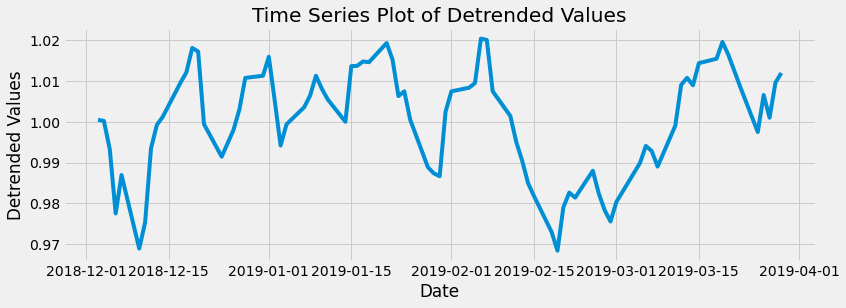

In [12]:
df1_time_index = df1.set_index("Time")
df1_time_index.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Detrended Values")
plt.title("Time Series Plot of Detrended Values")
 

plt.plot(df1_time_index["detrended_value"])

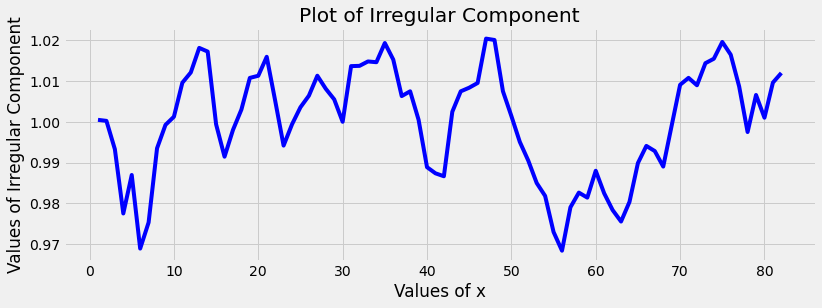

In [13]:
irregular = detrended_value
irregular
df1["irregular"] = irregular
df1.head()
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")

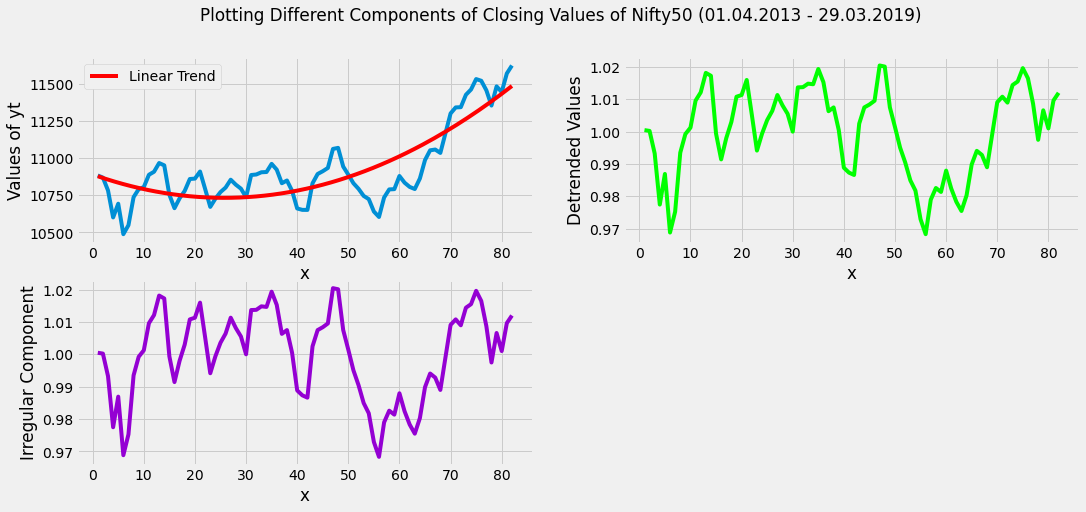

In [14]:
plt.figure(figsize=(16, 7))
plt.subplot(221)
plt.xlabel("x")
plt.ylabel("Values of yt")
#plt.title("Time Series Plot")
plt.plot(x, nifty_time["Close"])
plt.plot(myline, quad_trend(myline), color = 'red', label = 'Linear Trend')
plt.legend(framealpha=1, frameon=True)



plt.subplot(222)
plt.xlabel("x")
plt.ylabel("Detrended Values")
#plt.title("Time Series Plot of Detrended Values")
plt.plot(x, df1_time_index["detrended_value"], c = "lime")




plt.subplot(223)
plt.xlabel("x")
plt.ylabel("Irregular Component")
#plt.title("Plot of Irregular Component")
plt.plot(x, irregular, c = "darkviolet")



plt.suptitle("Plotting Different Components of Closing Values of Nifty50 (01.04.2013 - 29.03.2019)")
plt.show()


In [13]:
df1.head()

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-12-03,1,10883.75,10878.413704,1.000491,1.000491
1,2018-12-04,2,10869.50,10866.898904,1.000239,1.000239
2,2018-12-05,3,10782.90,10855.859506,0.993279,0.993279
3,2018-12-06,4,10601.15,10845.295510,0.977488,0.977488
4,2018-12-07,5,10693.70,10835.206917,0.986940,0.986940


In [15]:
train_data = df1[:63]
display(train_data)

test_data = df1[63:]
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-12-03,1,10883.75,10878.413704,1.000491,1.000491
1,2018-12-04,2,10869.50,10866.898904,1.000239,1.000239
2,2018-12-05,3,10782.90,10855.859506,0.993279,0.993279
3,2018-12-06,4,10601.15,10845.295510,0.977488,0.977488
4,2018-12-07,5,10693.70,10835.206917,0.986940,0.986940
...,...,...,...,...,...,...
58,2019-02-22,59,10791.65,10996.395296,0.981381,0.981381
59,2019-02-25,60,10880.10,11012.453829,0.987981,0.987981
60,2019-02-26,61,10835.30,11028.987765,0.982438,0.982438
61,2019-02-27,62,10806.65,11045.997103,0.978332,0.978332


,Time,x,yt_obs,T_t,detrended_value,irregular
63,2019-03-01,64,10863.50,11081.441986,0.980333,0.980333
64,2019-03-05,65,10987.45,11099.877531,0.989871,0.989871
65,2019-03-06,66,11053.00,11118.788478,0.994083,0.994083
66,2019-03-07,67,11058.20,11138.174827,0.992820,0.992820
67,2019-03-08,68,11035.40,11158.036579,0.989009,0.989009
68,2019-03-11,69,11168.05,11178.373733,0.999076,0.999076
69,2019-03-12,70,11301.20,11199.186290,1.009109,1.009109
70,2019-03-13,71,11341.70,11220.474249,1.010804,1.010804
71,2019-03-14,72,11343.25,11242.237610,1.008985,1.008985
72,2019-03-15,73,11426.85,11264.476373,1.014415,1.014415


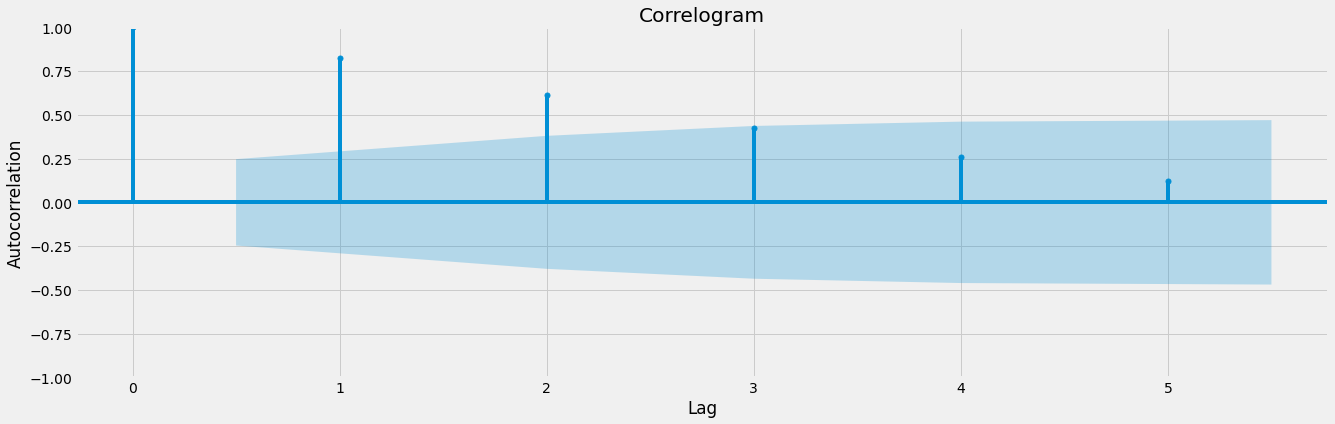

In [16]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(train_data["irregular"], lags=5, ax=ax)

# Set plot labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Correlogram')

# Show the plot
plt.show()

In [32]:
#df1.to_csv('output.csv', index= True)

In [17]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=3, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [22]:
len(AR1_values)


58

In [25]:
len(AR1_values)
AR1_values
Ar_ax = np.floor(np.linspace(6,63,58))
len(Ar_ax)

58

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-12-03,1,10883.75,10878.413704,1.000491,1.000491
1,2018-12-04,2,10869.50,10866.898904,1.000239,1.000239
2,2018-12-05,3,10782.90,10855.859506,0.993279,0.993279
3,2018-12-06,4,10601.15,10845.295510,0.977488,0.977488
4,2018-12-07,5,10693.70,10835.206917,0.986940,0.986940
...,...,...,...,...,...,...
58,2019-02-22,59,10791.65,10996.395296,0.981381,0.981381
59,2019-02-25,60,10880.10,11012.453829,0.987981,0.987981
60,2019-02-26,61,10835.30,11028.987765,0.982438,0.982438
61,2019-02-27,62,10806.65,11045.997103,0.978332,0.978332


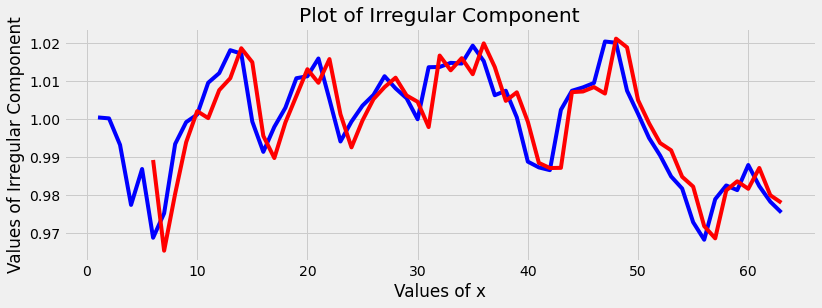

In [26]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(train_data["x"], train_data["irregular"], c = "blue")
plt.plot(Ar_ax, AR1_values, c = "red")
display(train_data)

In [19]:
#from statsmodels.tsa.api import SimpleExpSmoothing
#from sklearn.metrics import mean_squared_error

#smoothing_levels = np.linspace(0.1,0.9,100)
#sse_array = []

#best_alpha = None
#best_mse = float('inf')

# Calculate SSE for different smoothing levels
#for level in smoothing_levels:
#    model = SimpleExpSmoothing(irregular)
#    fitted_model = model.fit(smoothing_level=level)
#    fitted_values = fitted_model.fittedvalues
   
#    sse = ((fitted_values - irregular) ** 2).sum()
#    sse_array.append(sse)
#    mse = mean_squared_error(irregular, fitted_values)
#    if mse < best_mse:
#        best_alpha = level
#        best_mse = mse
   
#    print("Smoothing Level:", level)
#    print("Error Sum of Squares (SSE):", sse)
#    print()
#best_alpha

0.9

In [18]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

smoothing_levels = np.linspace(0.1,0.4,100)
sse_array = []

best_alpha = None
best_mse = float('inf')

# Calculate SSE for different smoothing levels
for level in smoothing_levels:
    model = SimpleExpSmoothing(train_data["irregular"])
    fitted_model = model.fit(smoothing_level=level)
    
    predictions = fitted_model.forecast(1)
    mse = (test_data["irregular"].iloc[0] - predictions)**2
    
    if mse.iloc[0] < best_mse:
        best_alpha = level
        best_mse = mse.iloc[0]
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
best_alpha

0.2545454545454546

In [19]:
from statsmodels.tsa.api import SimpleExpSmoothing

final_model_simp_exp = SimpleExpSmoothing(train_data["irregular"])
fitted_model_simp_exp = final_model_simp_exp.fit(smoothing_level = best_alpha)  # Adjust smoothing level as desired

# Obtain the fitted values and forecast for the next period
fitted_values_simp_exp = fitted_model_simp_exp.fittedvalues

# Print the fitted values and forecast
#print("Fitted Values:")
#print(fitted_values)

#sse = ((fitted_values - irregular) ** 2).sum()
#print("SSE:")
#print(sse)
print(fitted_model_simp_exp.summary())
fitted_values_simp_exp

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              irregular   No. Observations:                   63
Model:             SimpleExpSmoothing   SSE                              0.007
Optimized:                       True   AIC                           -568.612
Trend:                           None   BIC                           -564.325
Seasonal:                        None   AICC                          -567.922
Seasonal Periods:                None   Date:                 Mon, 17 Jul 2023
Box-Cox:                        False   Time:                         15:52:50
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2545455                alpha                False
initial_level              0.9932066                

0     0.993207
1     0.995061
2     0.996379
3     0.995590
4     0.990982
        ...   
58    0.982138
59    0.981946
60    0.983482
61    0.983216
62    0.981973
Length: 63, dtype: float64

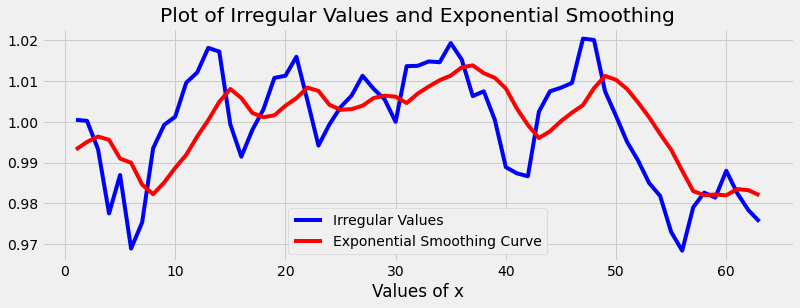

In [20]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
#plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Values and Exponential Smoothing")

plt.plot(train_data["x"], train_data["irregular"], c = "blue", label = "Irregular Values")
plt.plot(train_data["x"], fitted_values_simp_exp, c = "red", label = "Exponential Smoothing Curve")
plt.legend(framealpha=1, frameon=True)

In [21]:
test_predictions = fitted_model_simp_exp.forecast(19)
#mse = mean_squared_error(test_data['irregular'], test_predictions)
#print(mse)
#print(test_predictions)
#fitted_model_simp_exp.fittedvalues.forecast(10)
test_predictions
forecast_simexp = test_predictions

In [22]:
display(train_data)
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-12-03,1,10883.75,10878.413704,1.000491,1.000491
1,2018-12-04,2,10869.50,10866.898904,1.000239,1.000239
2,2018-12-05,3,10782.90,10855.859506,0.993279,0.993279
3,2018-12-06,4,10601.15,10845.295510,0.977488,0.977488
4,2018-12-07,5,10693.70,10835.206917,0.986940,0.986940
...,...,...,...,...,...,...
58,2019-02-22,59,10791.65,10996.395296,0.981381,0.981381
59,2019-02-25,60,10880.10,11012.453829,0.987981,0.987981
60,2019-02-26,61,10835.30,11028.987765,0.982438,0.982438
61,2019-02-27,62,10806.65,11045.997103,0.978332,0.978332


,Time,x,yt_obs,T_t,detrended_value,irregular
63,2019-03-01,64,10863.50,11081.441986,0.980333,0.980333
64,2019-03-05,65,10987.45,11099.877531,0.989871,0.989871
65,2019-03-06,66,11053.00,11118.788478,0.994083,0.994083
66,2019-03-07,67,11058.20,11138.174827,0.992820,0.992820
67,2019-03-08,68,11035.40,11158.036579,0.989009,0.989009
68,2019-03-11,69,11168.05,11178.373733,0.999076,0.999076
69,2019-03-12,70,11301.20,11199.186290,1.009109,1.009109
70,2019-03-13,71,11341.70,11220.474249,1.010804,1.010804
71,2019-03-14,72,11343.25,11242.237610,1.008985,1.008985
72,2019-03-15,73,11426.85,11264.476373,1.014415,1.014415


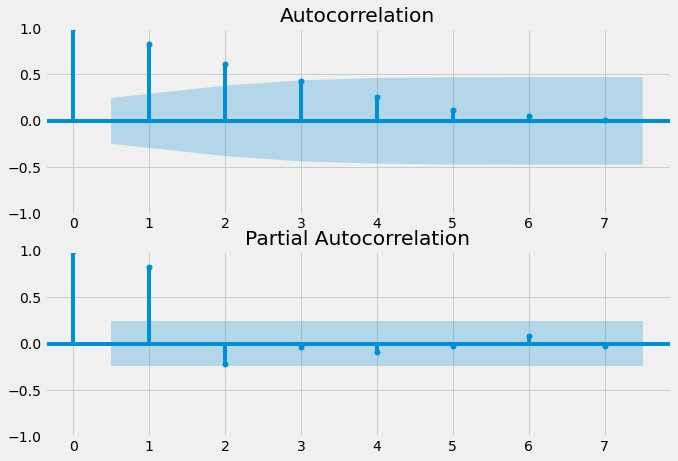

In [24]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
sm.graphics.tsa.plot_acf(train_data["irregular"], ax=ax1, lags=7)
sm.graphics.tsa.plot_pacf(train_data["irregular"], ax=ax2, lags=7,  method='ywm')
plt.show()

In [25]:
plt.figure(figsize=(12, 4))

import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(train_data["irregular"], order=(4, 0, 1))  # ARIMA(p, d, q) where d=0 for ARMA model
results_arima = model_arima.fit(method_kwargs={'maxiter': 4000})
fitted_values_arima = results_arima.fittedvalues
#print(fitted_values_arima)

est_residual_train = fitted_values_arima

est_yt_train = train_data["T_t"]*est_residual_train
#print(est_residual_train)
#print(est_yt_train)

<Figure size 864x288 with 0 Axes>

In [26]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=3, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [27]:
forecast_start = len(train_data["irregular"])
forecast_end = forecast_start + 18  # Adjust the forecast horizon as needed
forecast = results_arima.predict(start=forecast_start, end=forecast_end)
#print(forecast)

est_residual_test = forecast
est_yt_test = test_data["T_t"]*est_residual_test
est_yt_test_ar = test_data["T_t"]*forecast_ar
est_yt_test_simexp = test_data["T_t"]*forecast_simexp

2     0.993279
3     0.977488
4     0.986940
5     0.968857
6     0.975287
        ...   
58    0.981381
59    0.987981
60    0.982438
61    0.978332
62    0.975507
Name: irregular, Length: 61, dtype: float64


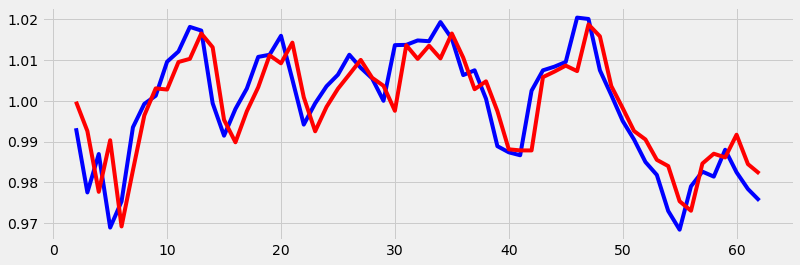

In [29]:
plt.figure(figsize=(12, 4))
plt.plot((train_data["irregular"])[2:], color = "blue")
plt.plot(fitted_values_arima[2:], color = "red")

#plt.plot(fitted_values_arima, color = "red")
print((train_data["irregular"])[2:])

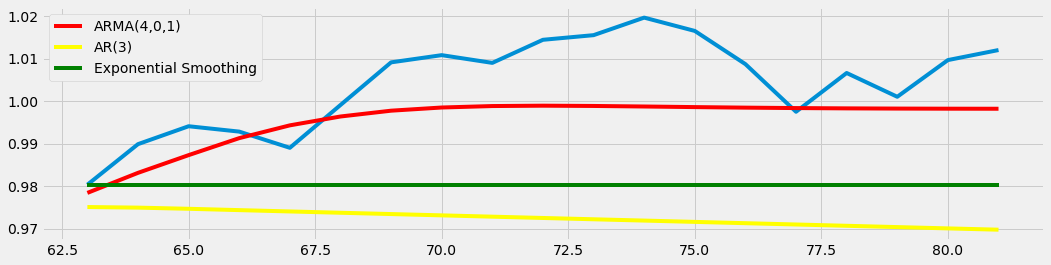

In [30]:
plt.figure(figsize=(16, 4))
plt.plot(test_data["irregular"])
plt.plot(forecast, color = "red", label = "ARMA(4,0,1)")
plt.plot(forecast_ar, color = "yellow", label = "AR(3)")
plt.plot(forecast_simexp, color = "green", label = "Exponential Smoothing")
plt.legend(framealpha=1, frameon=True)

plt.show()

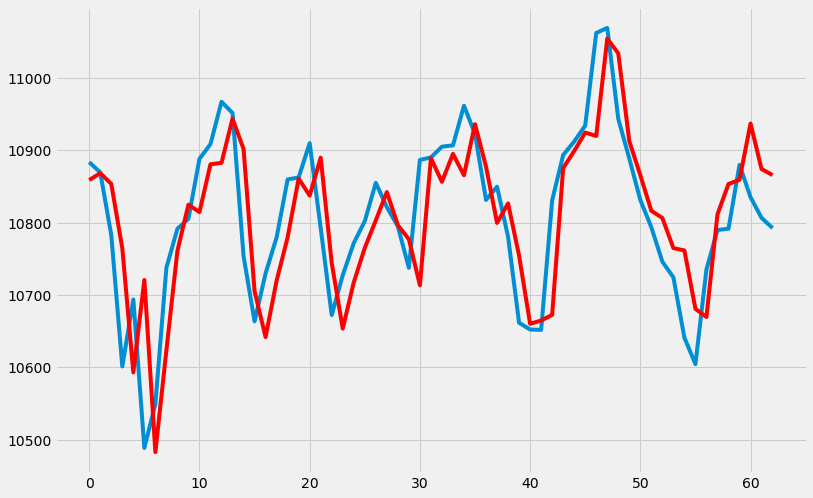

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(train_data["yt_obs"])
plt.plot(est_yt_train, color = "red")
plt.show()

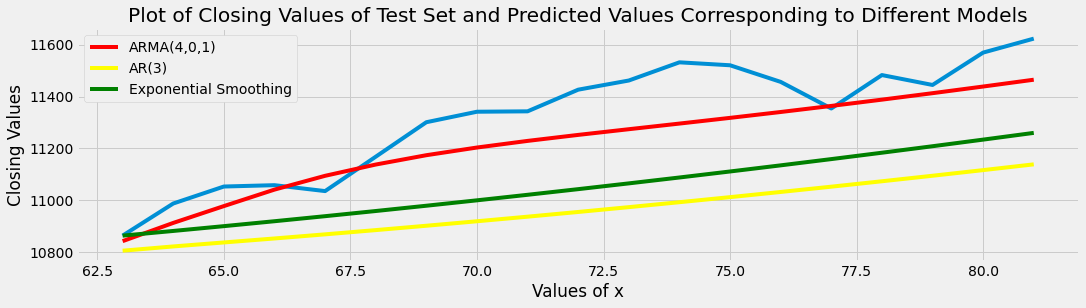

293660.9303766758
2748008.2061480945
1635741.8084702517


In [33]:
plt.figure(figsize=(16, 4))
plt.xlabel("Values of x")
plt.ylabel("Closing Values")
plt.title("Plot of Closing Values of Test Set and Predicted Values Corresponding to Different Models")


plt.plot(test_data["yt_obs"])
plt.plot(est_yt_test, color = "red", label = "ARMA(4,0,1)")
plt.plot(est_yt_test_ar, color = "yellow", label = "AR(3)")
plt.plot(est_yt_test_simexp, color = "green", label = "Exponential Smoothing")

plt.legend(framealpha=1, frameon=True)
plt.show()

test_error_arma = sum(np.square(test_data["yt_obs"] - est_yt_test))
print(test_error_arma)

test_error_ar = sum(np.square(test_data["yt_obs"] - est_yt_test_ar))
print(test_error_ar)

test_error_simexp = sum(np.square(test_data["yt_obs"] - est_yt_test_simexp))
print(test_error_simexp)
